# Best Ads detection using bandit methods
> Multi-armed Bandit for Banner Ad and 4 Exploration Strategies

- toc: false
- badges: true
- comments: true
- categories: [Bandit, RL, MAB]
- image:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# First, let's clone the Gym bandits repository:
! git clone https://github.com/JKCooper2/gym-bandits

# Next, we can install it using pip:
%cd gym-bandits
! pip install -e .

# After installation, we import gym_bandits and also the gym library:
import gym_bandits
import gym

# gym_bandits provides several versions of the bandit environment. 
# We can examine the different bandit versions at https://github.com/JKCooper2/gym-bandits

#Let's just create a simple 2-armed bandit whose environment ID is BanditTwoArmedHighLowFixed-v0:
env = gym.make("BanditTwoArmedHighLowFixed-v0")

# Since we created a 2-armed bandit, our action space will be 2 (as there are two arms), as shown here:
print(env.action_space.n)    # The preceding code will print: 2

# We can also check the probability distribution of the arm with:
print(env.p_dist)    # The preceding code will print: [0.8, 0.2]

fatal: destination path 'gym-bandits' already exists and is not an empty directory.
/content/gym-bandits
Obtaining file:///content/gym-bandits
  Running setup.py develop for gym-bandits
2
[0.8, 0.2]


In [ ]:
# First, let's initialize the variables.
# Initialize the count for storing the number of times an arm is pulled:
count = np.zeros(2)
# Initialize sum_rewards for storing the sum of rewards of each arm:
sum_rewards = np.zeros(2)
# Initialize Q for storing the average reward of each arm:
Q = np.zeros(2)
# Set the number of rounds (iterations):
num_rounds = 100

# Now, let's define the epsilon_greedy function.
def epsilon_greedy(epsilon):
    """First, we generate a random number from a uniform distribution. If the random 
    number is less than epsilon, then we pull the random arm; else, we pull 
    the best arm that has the maximum average reward"""

    if np.random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q)

# Now, let's play the game and try to find the best arm using the epsilon-greedy method.
# For each round:
for i in range(num_rounds):
  # Select the arm based on the epsilon-greedy method:
  arm = epsilon_greedy(epsilon=0.5)
  # Pull the arm and store the reward and next state information:
  next_state, reward, done, info = env.step(arm)
  # Increment the count of the arm by 1:
  count[arm] += 1
  # Update the sum of rewards of the arm:
  sum_rewards[arm]+=reward
  # Update the average reward of the arm:
  Q[arm] = sum_rewards[arm]/count[arm]
  
# After all the rounds, we look at the average reward obtained from each of the arms:
print(Q)    # The preceding code will print something like this: [0.xx 0.yy]

# Now, we can select the optimal arm as the one that has the maximum average reward:
print('The optimal arm is arm {}'.format(np.argmax(Q)+1))

[0.81012658 0.0952381 ]
The optimal arm is arm 1


In [ ]:
# First, let's initialize the variables.
# Initialize the count for storing the number of times an arm is pulled:
count = np.zeros(2)
# Initialize sum_rewards for storing the sum of rewards of each arm:
sum_rewards = np.zeros(2)
# Initialize Q for storing the average reward of each arm:
Q = np.zeros(2)
# Set the number of rounds (iterations):
num_rounds = 100

# Now, we define the softmax function with the temperature T:
def softmax(T):
  # Compute the probability of each arm based on the temperature equation:
  denom = sum([np.exp(i/T) for i in Q])
  probs = [np.exp(i/T)/denom for i in Q]
  # Select the arm based on the computed probability distribution of arms:
  arm = np.random.choice(env.action_space.n, p=probs)  
  return arm

# Now, let's play the game and try to find the best arm using the softmax exploration method.
# Let's begin by setting the temperature T to a high number, say, 50:
T = 50
# For each round:
for i in range(num_rounds):
  # Select the arm based on the softmax exploration method:
  arm = softmax(T)
  # Pull the arm and store the reward and next state information:
  next_state, reward, done, info = env.step(arm)
  # Increment the count of the arm by 1:
  count[arm] += 1
  # Update the sum of rewards of the arm:
  sum_rewards[arm]+=reward
  # Update the average reward of the arm:
  Q[arm] = sum_rewards[arm]/count[arm]
  # Reduce the temperature T:
  T = T*0.99

# After all the rounds, we check the Q value, that is, the average reward of all the arms:
print(Q)    # The preceding code will print something like this: [0.xx 0.yy]

# Now, we can select the optimal arm as the one that has the maximum average reward:
print('The optimal arm is arm {}'.format(np.argmax(Q)+1))

[0.73214286 0.11363636]
The optimal arm is arm 1


In [ ]:
# First, let's initialize the variables.
# Initialize the count for storing the number of times an arm is pulled:
count = np.zeros(2)
# Initialize sum_rewards for storing the sum of rewards of each arm:
sum_rewards = np.zeros(2)
# Initialize Q for storing the average reward of each arm:
Q = np.zeros(2)
# Set the number of rounds (iterations):
num_rounds = 100

# Now, we define the UCB function, which returns the best arm as the 
# one that has the highest UCB:
def UCB(i):
  # Initialize the numpy array for storing the UCB of all the arms:
  ucb = np.zeros(2)
  # Before computing the UCB, we explore all the arms at least once, so for the 
  # first 2 rounds, we directly select the arm corresponding to the round number:
  if i < 2:
    return i
  # If the round is greater than 2, then we compute the UCB of all the arms as 
  # specified in the UCB equation and return the arm that has the highest UCB:
  else:
    for arm in range(2):
      ucb[arm] = Q[arm] + np.sqrt((2*np.log(sum(count))) / count[arm])
  return (np.argmax(ucb))

# Now, let's play the game and try to find the best arm using the UCB method.
# For each round:
for i in range(num_rounds):
  # Select the arm based on the UCB method:
  arm = UCB(i)
  # Pull the arm and store the reward and next state information:
  next_state, reward, done, info = env.step(arm)
  # Increment the count of the arm by 1:
  count[arm] += 1
  # Update the sum of rewards of the arm:
  sum_rewards[arm]+=reward
  # Update the average reward of the arm:
  Q[arm] = sum_rewards[arm]/count[arm]

# Now, we can select the optimal arm as the one that has the maximum average reward:
print('The optimal arm is arm {}'.format(np.argmax(Q)+1))

The optimal arm is arm 1


In [ ]:
# First, let's initialize the variables.
# Initialize the count for storing the number of times an arm is pulled:
count = np.zeros(2)
# Initialize sum_rewards for storing the sum of rewards of each arm:
sum_rewards = np.zeros(2)
# Initialize Q for storing the average reward of each arm:
Q = np.zeros(2)
# Initialize the alpha value as 1 for both arms:
alpha = np.ones(2)
# Initialize the beta value as 1 for both arms:
beta = np.ones(2)
# Set the number of rounds (iterations):
num_rounds = 100

# Now, let's define the thompson_sampling function
def thompson_sampling(alpha,beta):
  """we randomly sample values from the beta distributions of both arms and 
  return the arm that has the maximum sampled value"""
  samples = [np.random.beta(alpha[i]+1,beta[i]+1) for i in range(2)]
  return np.argmax(samples)

# Now, let's play the game and try to find the best arm using the Thompson sampling method.
# For each round:
for i in range(num_rounds):
  # Select the arm based on the Thompson sampling method:
  arm = thompson_sampling(alpha,beta)
  # Pull the arm and store the reward and next state information:
  next_state, reward, done, info = env.step(arm) 
  # Increment the count of the arm by 1:
  count[arm] += 1
  # Update the sum of rewards of the arm:
  sum_rewards[arm]+=reward
  # Update the average reward of the arm:
  Q[arm] = sum_rewards[arm]/count[arm]
  # If we win the game, that is, if the reward is equal to 1, then we update 
  # the value of alpha to alpha+1, else we update the value of beta to beta+1:
  if reward==1:
    alpha[arm] = alpha[arm] + 1
  else:
    beta[arm] = beta[arm] + 1

# After all the rounds, we can select the optimal arm as the one that has the highest average reward:
print('The optimal arm is arm {}'.format(np.argmax(Q)+1))

The optimal arm is arm 1


In [ ]:
# Creating a dataset
# We generate a dataset with five columns denoting the five advertisement banners, 
# where the values in the rows will be either 0 or 1, indicating whether the 
# advertisement banner has been clicked (1) or not clicked (0) by the user:
df = pd.DataFrame()
for i in range(5):
  df['Banner_type_'+str(i)] = np.random.randint(0,2,100000)

# Now, let's initialize some of the important variables.
# Set the number of iterations:
num_iterations = 100000
# Define the number of banners:
num_banner = 5
# Initialize count for storing the number of times the banner was clicked:
count = np.zeros(num_banner)
# Initialize sum_rewards for storing the sum of rewards obtained from each banner:
sum_rewards = np.zeros(num_banner)
# Initialize Q for storing the mean reward of each banner:
Q = np.zeros(num_banner)
# Define a list for storing the selected banners:
banner_selected = []

# Now, let's define the epsilon-greedy method:
def epsilon_greedy_policy(epsilon):
  if np.random.uniform(0,1) < epsilon:
    return np.random.choice(num_banner)
  else:
    return np.argmax(Q)

# Now, we run the epsilon-greedy policy to find out which advertisement banner is the best.
# For each iteration:
for i in range(num_iterations):
  # Select the banner using the epsilon-greedy policy:
  banner = epsilon_greedy_policy(0.5)
  # Get the reward of the banner:
  reward = df.values[i, banner]
  # Increment the counter:
  count[banner] += 1
  # Store the sum of rewards:
  sum_rewards[banner]+=reward
  # Compute the average reward:
  Q[banner] = sum_rewards[banner]/count[banner]
  # Store the banner to the banner selected list:
  banner_selected.append(banner)

# After all the rounds, we can select the best banner as the one that has the maximum average reward:
print( 'The best banner is banner {}'.format(np.argmax(Q)))

The best banner is banner 0


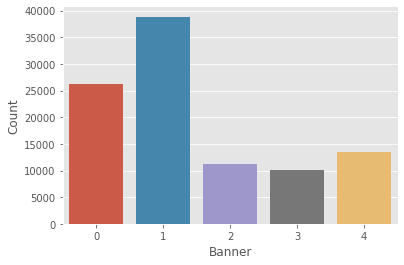

In [ ]:
# We can also plot and see which banner is selected the most often:
ax = sns.countplot(banner_selected)
ax.set(xlabel='Banner', ylabel='Count')
plt.show()